In [1]:
import piplite
await piplite.install('seaborn')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score

In [3]:
# Charger les données dans un dataframe
df = pd.read_csv("seeds.csv")

In [4]:
# Extraction des données 
x = df[['Area', 'Perimeter']].values
y = df['Type'].values
h = .02

In [5]:
#diviser le dataset en jeu d'apprentissage et jeu de test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [6]:
#tester k de 1 à 20
neighbors = np.arange(1,21)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #le calcul avec la distance euclidienne et on peut la modifier " metric='manhattan' "
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)

In [7]:
print(test_accuracy)

[0.875 0.85  0.875 0.9   0.85  0.875 0.875 0.875 0.875 0.925 0.875 0.9
 0.9   0.9   0.9   0.9   0.9   0.9   0.875 0.875]


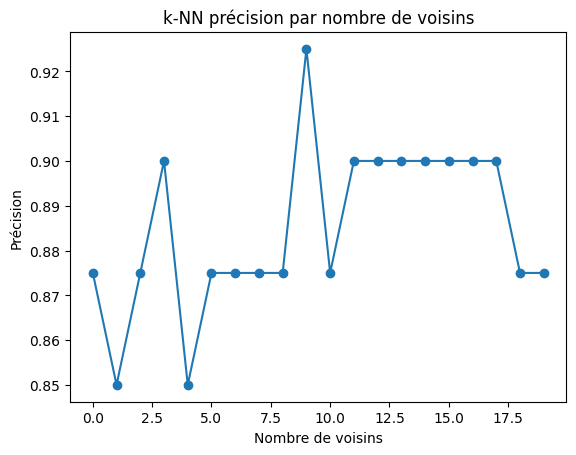

In [8]:
#visualisation taux de précision (test)
plt.plot(test_accuracy, 'o-')
plt.title('k-NN précision par nombre de voisins')
plt.xlabel('Nombre de voisins')
plt.ylabel('Précision')
plt.show()

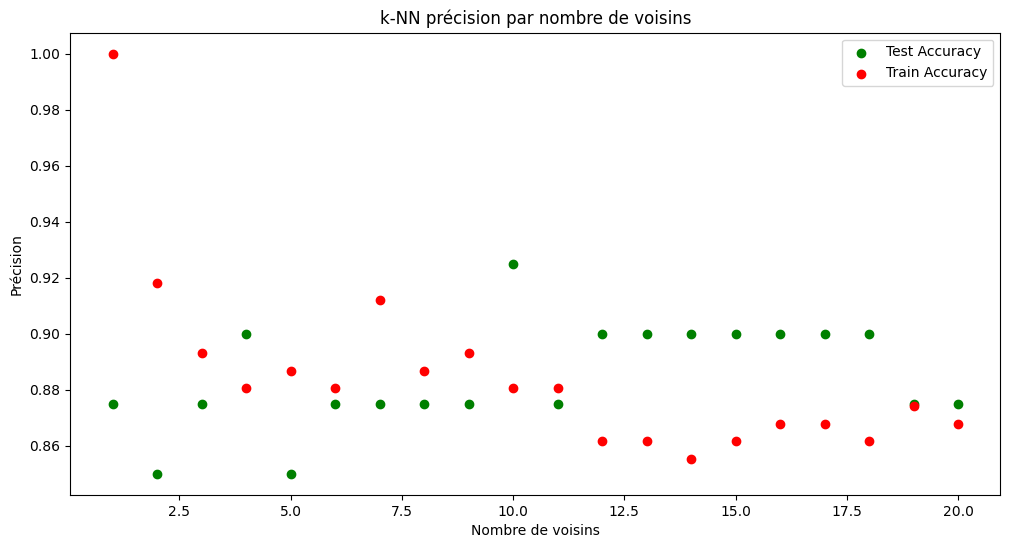

In [9]:
#visualisation taux d'apprentissage et test
plt.figure(figsize=(12,6))
plt.title('k-NN précision par nombre de voisins')
plt.scatter(neighbors, test_accuracy, label='Test Accuracy', color="green")
plt.scatter(neighbors, train_accuracy, label='Train Accuracy', color="red")
plt.legend()
plt.xlabel('Nombre de voisins')
plt.ylabel('Précision')
plt.show()

In [10]:
#créer le modèle KNN
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [11]:
#le taux de précision 
score = knn.score(x_test, y_test)
print('Score: %f' % score)

Score: 0.925000


In [12]:
y_pred=knn.predict(x_test)

In [13]:
#matrice de confusion 
cm = confusion_matrix(y_test,y_pred)
cm

array([[11,  2,  1],
       [ 0, 18,  0],
       [ 0,  0,  8]], dtype=int64)

In [14]:
np.bincount(y_test.astype('int32'))

array([ 0, 14, 18,  8], dtype=int32)

In [15]:
# Calculer le F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print('F1-score:', f1)

F1-score: 0.9225510835913313


********************************************************************************

In [16]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True


In [17]:
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

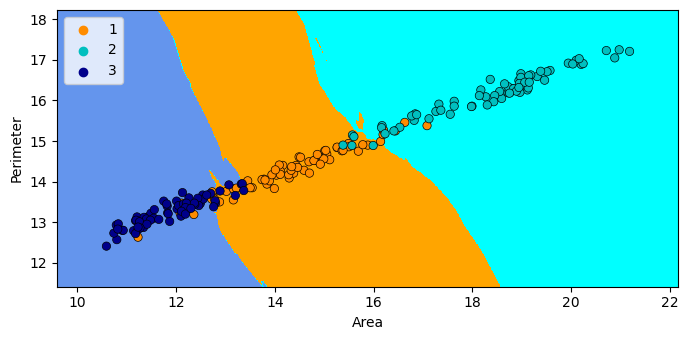

In [18]:
k=10
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()

plt.contourf(xx, yy, Z, cmap=cmap_light)

sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y,
palette=cmap_bold, alpha=1.0, edgecolor="black")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


plt.xlabel('Area')
plt.ylabel('Perimeter')

plt.show()

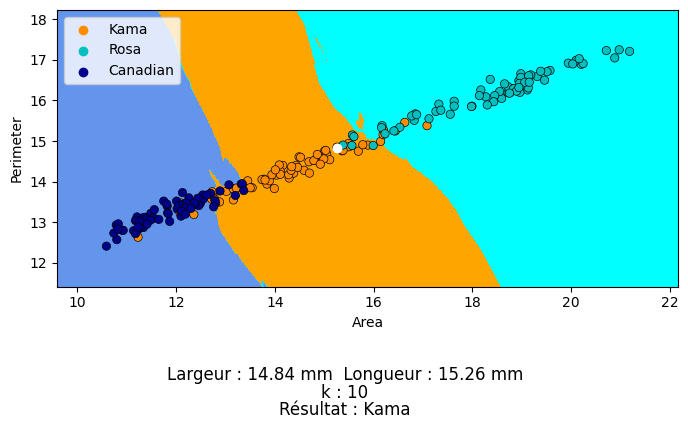

In [19]:
# Définition des valeurs d'entrée
longueur = 15.26
largeur = 14.84
k=10

x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()

plt.contourf(xx, yy, Z, cmap=cmap_light)

sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y,
palette=cmap_bold, alpha=1.0, edgecolor="black")

plt.scatter(longueur, largeur, color='white')
prediction = knn.predict([[longueur, largeur]])

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


plt.xlabel('Area')
plt.ylabel('Perimeter')

# Affichage des résultats
txt = "Résultat : "
if prediction[0] == 1:
    txt = txt + "Kama"
elif prediction[0] == 2:
    txt = txt + "Rosa"
else:
    txt = txt + "Canadian"

plt.figtext(0.5, -0.1, f"Largeur : {largeur} mm  Longueur : {longueur} mm", ha='center', fontsize=12)
plt.figtext(0.5, -0.15, f"k : {k}", ha='center', fontsize=12)
plt.figtext(0.5, -0.2, txt, ha='center', fontsize=12)


handles, labels = plt.gca().get_legend_handles_labels()
labels = ['Kama', 'Rosa', 'Canadian']
plt.legend(handles, labels)

plt.show()